## Importing Libraries:

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Reading The Files:

In [ ]:
data_train = pd.read_csv("train_data.csv") 
prod_price = pd.read_csv("product_prices.csv")
date_week= pd.read_csv("date_to_week_id_map.csv")
data_test= pd.read_csv("test_data.csv") 

## Data Exploration:

In [ ]:
print(data_train.shape)
print(data_test.shape)

In [ ]:
data_train.shape
data_test.shape

In [ ]:
data_train.head()

,date,product_identifier,department_identifier,category_of_product,outlet,state,sales
0,2012-01-01,74,11,others,111,Maharashtra,0
1,2012-01-01,337,11,others,111,Maharashtra,1


In [ ]:
data_test.head()

,id,date,product_identifier,department_identifier,category_of_product,outlet,state
0,1,2014-03-01,74,11,others,111,Maharashtra
1,2,2014-03-01,337,11,others,111,Maharashtra
2,3,2014-03-01,423,12,others,111,Maharashtra


## Understanding the data using basic visualization:

In [ ]:
x = data_train['category_of_product']
y = data_train['sales']

Text(0, 0.5, 'sales')

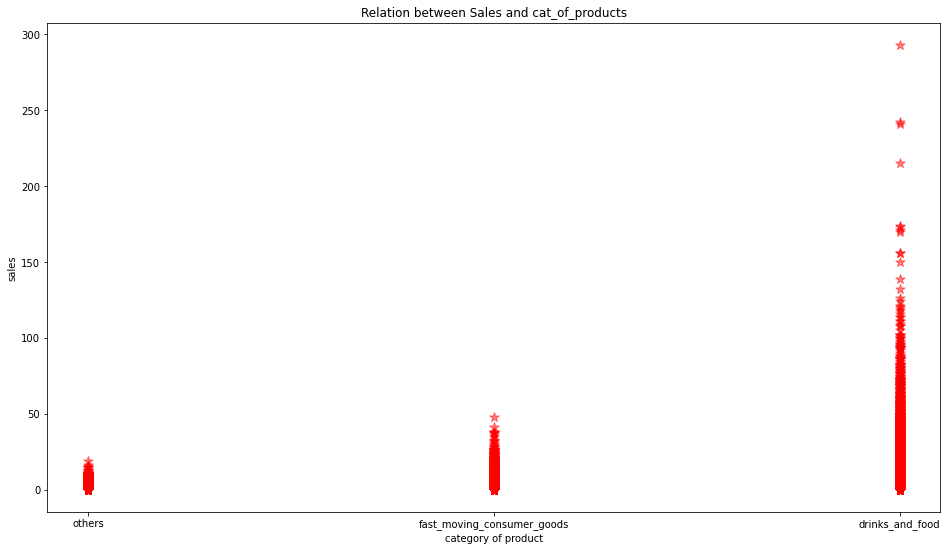

In [ ]:
plt.figure(figsize=(16,9))
plt.scatter(x,y,c='r',marker='*',s=100,alpha=0.5)
plt.title('Relation between Sales and cat_of_products')
plt.xlabel('category of product')
plt.ylabel('sales') 

In [ ]:
x1 = data_train['state']
y1= data_train['sales']

Text(0, 0.5, 'sales')

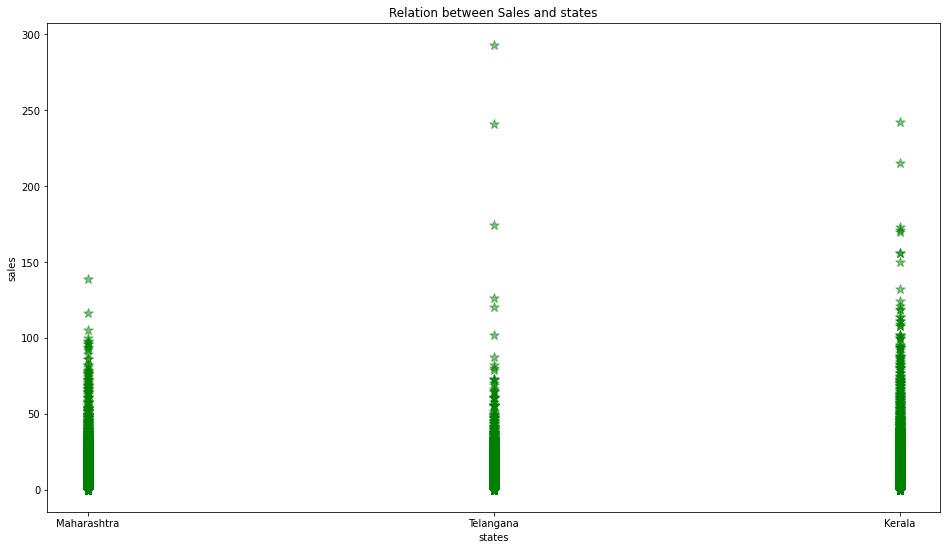

In [ ]:
plt.figure(figsize=(16,9))
plt.scatter(x1,y1,c='g',marker='*',s=100,alpha=0.5)
plt.title('Relation between Sales and states')
plt.xlabel('states')
plt.ylabel('sales') 

## Merging two csv files:

In [ ]:
## Merging the prod_price and date_week
merged_data=pd.merge(prod_price,date_week,on=['week_id'],how='inner') 

NameError: ignored

### Basic Summary Statistics:

In [ ]:
merged_data.describe(include = 'all') 

### Exploring the merged data:

In [ ]:
merged_data.head()

In [ ]:
## merging the merged_data and data_train:
train_data_merge=pd.merge(merged_data,data_train,on=['date','product_identifier','outlet'],how='inner') 
test_data_merge=pd.merge(merged_data,data_test,on=['date','product_identifier','outlet'],how='inner') 

In [ ]:
train_data_merge.head() 

In [ ]:
test_data_merge.head()

In [ ]:
train_data_merge.shape

In [ ]:
test_data_merge.shape

In [ ]:
train_data_merge.dtypes

In [ ]:
test_data_merge.dtypes

In [ ]:
train_data_merge.nunique()



In [ ]:
test_data_merge.nunique()

## Data Preprocessing:

In [ ]:
test_data_merge.drop(['id'],axis=1)

,outlet,product_identifier,week_id,sell_price,date,department_identifier,category_of_product,state
0,111,74,162,3.43,2014-03-01,11,others,Maharashtra
1,111,74,162,3.43,2014-03-02,11,others,Maharashtra
2,111,74,162,3.43,2014-03-03,11,others,Maharashtra
3,111,74,162,3.43,2014-03-04,11,others,Maharashtra
4,111,74,162,3.43,2014-03-05,11,others,Maharashtra
...,...,...,...,...,...,...,...,...
15495,333,3008,166,1.98,2014-03-30,33,drinks_and_food,Kerala
15496,333,3008,166,1.98,2014-03-31,33,drinks_and_food,Kerala
15497,333,3021,166,2.08,2014-03-29,33,drinks_and_food,Kerala
15498,333,3021,166,2.08,2014-03-30,33,drinks_and_food,Kerala


In [ ]:
test_data_merge.drop(['id'],axis=1) 

,outlet,product_identifier,week_id,sell_price,date,department_identifier,category_of_product,state
0,111,74,162,3.43,2014-03-01,11,others,Maharashtra
1,111,74,162,3.43,2014-03-02,11,others,Maharashtra
2,111,74,162,3.43,2014-03-03,11,others,Maharashtra
3,111,74,162,3.43,2014-03-04,11,others,Maharashtra
4,111,74,162,3.43,2014-03-05,11,others,Maharashtra
...,...,...,...,...,...,...,...,...
15495,333,3008,166,1.98,2014-03-30,33,drinks_and_food,Kerala
15496,333,3008,166,1.98,2014-03-31,33,drinks_and_food,Kerala
15497,333,3021,166,2.08,2014-03-29,33,drinks_and_food,Kerala
15498,333,3021,166,2.08,2014-03-30,33,drinks_and_food,Kerala


In [ ]:
train_data_merge.isna().sum()

outlet                   0
product_identifier       0
week_id                  0
sell_price               0
date                     0
department_identifier    0
category_of_product      0
state                    0
sales                    0
dtype: int64

In [ ]:
test_data_merge.isna().sum()

outlet                   0
product_identifier       0
week_id                  0
sell_price               0
date                     0
id                       0
department_identifier    0
category_of_product      0
state                    0
dtype: int64

In [ ]:
x_train=train_data_merge.drop(['sales'],axis=1)
y_train=train_data_merge['sales'] 

In [ ]:
test_data_merge['sales']=train_data_merge['sales'] 

In [ ]:
x_train.head()  

,outlet,product_identifier,week_id,sell_price,date,department_identifier,category_of_product,state
0,111,74,49,2.94,2012-01-01,11,others,Maharashtra
1,111,74,49,2.94,2012-01-02,11,others,Maharashtra
2,111,74,49,2.94,2012-01-03,11,others,Maharashtra
3,111,74,49,2.94,2012-01-04,11,others,Maharashtra
4,111,74,49,2.94,2012-01-05,11,others,Maharashtra


In [ ]:
test_data_merge.head()

,outlet,product_identifier,week_id,sell_price,date,id,department_identifier,category_of_product,state,sales
0,111,74,162,3.43,2014-03-01,1,11,others,Maharashtra,0
1,111,74,162,3.43,2014-03-02,501,11,others,Maharashtra,0
2,111,74,162,3.43,2014-03-03,1001,11,others,Maharashtra,1
3,111,74,162,3.43,2014-03-04,1501,11,others,Maharashtra,0
4,111,74,162,3.43,2014-03-05,2001,11,others,Maharashtra,0


In [ ]:
x_test=test_data_merge.drop(['sales'],axis=1)
y_test=test_data_merge['sales'] 

In [ ]:
train_data_merge.columns 

Index(['outlet', 'product_identifier', 'week_id', 'sell_price', 'date',
       'department_identifier', 'category_of_product', 'state', 'sales'],
      dtype='object')

In [ ]:
## Dividing the categorical and numerical attributes:
cat_cols=['category_of_product','state']
num_cols=['month', 'product_identifier', 'department_identifier','outlet','sell_price'] 

In [ ]:
train_data_merge[cat_cols]=train_data_merge[cat_cols].astype('category')
test_data_merge[cat_cols]=test_data_merge[cat_cols].astype('category') 

In [ ]:
print(train_data_merge.dtypes)


outlet                      int64
product_identifier          int64
week_id                     int64
sell_price                float64
date                       object
department_identifier       int64
category_of_product      category
state                    category
sales                       int64
dtype: object


In [ ]:
print(test_data_merge.dtypes) 

outlet                      int64
product_identifier          int64
week_id                     int64
sell_price                float64
date                       object
id                          int64
department_identifier       int64
category_of_product      category
state                    category
sales                       int64
dtype: object


## Converting the date to month:

In [ ]:
train_data_merge['month']=pd.to_datetime(train_data_merge['date']).dt.month

In [ ]:
test_data_merge['month']=pd.to_datetime(test_data_merge['date']).dt.month

In [ ]:
train_data_merge.month.nunique()

12

In [ ]:
train_data_merge.dtypes

outlet                      int64
product_identifier          int64
week_id                     int64
sell_price                float64
date                       object
department_identifier       int64
category_of_product      category
state                    category
sales                       int64
month                       int64
dtype: object

## Updating the train_data_merge by droping date and week_id:
:

In [ ]:
updated_train_merge=train_data_merge.drop(['date','week_id'],axis=1) 

In [ ]:
updated_test_merge=test_data_merge.drop(['date','week_id','id'],axis=1)

## Assigning the updated data to the x_train and y_train:

In [ ]:
x_train=updated_train_merge.drop(['sales'],axis=1)
y_train=updated_train_merge['sales']

In [ ]:
x_test=updated_test_merge.drop(['sales'],axis=1)
y_test=updated_test_merge['sales']

## Convertion of categorical attributes:

In [ ]:
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder()
ohe.fit(x_train[cat_cols])
x_train_ohe=ohe.transform(x_train[cat_cols]).toarray()


ohe.fit(x_test[cat_cols])
x_test_ohe=ohe.transform(x_test[cat_cols]).toarray() 

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train[num_cols])
x_train_ss=scaler.transform(x_train[num_cols])

scaler.fit(x_test[num_cols])
x_test_ss=scaler.transform(x_test[num_cols])

## Concatenating scaled and ohe output data:

In [ ]:
x_train=np.concatenate([x_train_ohe,x_train_ss],axis=1) 
x_test=np.concatenate([x_test_ohe,x_test_ss],axis=1) 